In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycalphad import Database, Equilibrium, Model, binplot
import pycalphad.variables as v

In [2]:
db_alpt = Database('alpt_2015.tdb')
#my_phases_alpt = ['PT2AL', 'BCC_B2', 'PT5AL21', 'PT5AL3', 'FCC_L12', 'LIQUID', 'AL3NI2', 'PT8AL21', 'PT2AL3']
my_phases_alpt = ['LIQUID', 'FCC_L12']
pdens_dict = [{'FCC_L12': 100}, 100]
import pycalphad.log
pycalphad.log.debug_mode()
%time eq = Equilibrium(db_alpt, ['AL', 'PT', 'VA'] , my_phases_alpt, {v.X('PT'): 0.999}, T=1200.0, mode='numexpr', pdens=pdens_dict)
print(eq)

pycalphad DEBUG 2015-04-03 15:07:13,683 [__init__ 51] Model of LIQUID has components {'AL', 'PT'}
pycalphad DEBUG 2015-04-03 15:07:13,997 [__init__ 51] Model of FCC_L12 has components {'AL', 'PT', 'VA'}
pycalphad DEBUG 2015-04-03 15:07:18,244 [energy_surf 219] vacancy_indices: None
pycalphad DEBUG 2015-04-03 15:07:18,802 [energy_surf 219] vacancy_indices: None
pycalphad DEBUG 2015-04-03 15:07:18,854 [lower_convex_hull 108] trial matrix: [[ 1.  0.]
 [ 0.  1.]]
pycalphad DEBUG 2015-04-03 15:07:18,855 [lower_convex_hull 117] fractions: [ 0.001  0.999]
pycalphad DEBUG 2015-04-03 15:07:18,856 [lower_convex_hull 122] new matrix: [[ 1.  0.]
 [ 0.  1.]]
pycalphad DEBUG 2015-04-03 15:07:18,857 [lower_convex_hull 123] new energies: [-54976.32497285  -5497.63249728]
pycalphad DEBUG 2015-04-03 15:07:18,858 [lower_convex_hull 126] new_potentials: [-54976.32497285  -5497.63249728]
pycalphad DEBUG 2015-04-03 15:07:18,858 [lower_convex_hull 133] New simplex [2 1] reduces energy from                   

CPU times: user 5.31 s, sys: 5 ms, total: 5.31 s
Wall time: 5.31 s
Molar Gibbs Energy:    -7.113998E+04
Potentials:
T=1200.0
Molar Composition:
X(AL)=1.000000E-03    X(PT)=9.990000E-01

FCC_L12#1    1.000000E+00
Mole fractions:    AL 1.000000E-03    PT 9.990000E-01
Sublattice 1: 0.25 sites
    AL 6.938894E-18    PT 1.000000E+00
Sublattice 2: 0.25 sites
    AL 4.000000E-03    PT 9.960000E-01
Sublattice 3: 0.25 sites
    AL 0.000000E+00    PT 1.000000E+00
Sublattice 4: 0.25 sites
    AL 0.000000E+00    PT 1.000000E+00
Sublattice 5: 1.0 sites
    VA 1.000000E+00



In [3]:
mod_l12 = Model(db_alpt, ['AL', 'PT', 'VA'], 'FCC_L12')
xal = 1e-6
xpt = 1.0-1e-6
print(4*mod_l12.ast.diff(v.Y('FCC_L12', 1, 'PT')).subs({v.T: 1200.0, v.Y('FCC_L12', 0, 'AL'): xal, v.Y('FCC_L12', 0, 'PT'): xpt, v.Y('FCC_L12', 1, 'AL'): xal, v.Y('FCC_L12', 1, 'PT'): xpt, v.Y('FCC_L12', 2, 'AL'): xal, v.Y('FCC_L12', 2, 'PT'): xpt, v.Y('FCC_L12', 3, 'AL'): xal, v.Y('FCC_L12', 3, 'PT'): xpt, v.Y('FCC_L12', 4, 'VA'): 1.0}))
mod_a1 = Model(db_alpt, ['AL', 'PT', 'VA'], 'FCC_A1')
print(mod_a1.ast.diff(v.Y('FCC_A1', 0, 'PT')).subs({v.T: 1200.0, v.Y('FCC_A1', 0, 'AL'): xal, v.Y('FCC_A1', 0, 'PT'): xpt,  v.Y('FCC_A1', 1, 'VA'): 1.0}))

pycalphad DEBUG 2015-03-28 14:29:41,815 [__init__ 44] Model of FCC_L12 has components {'VA', 'PT', 'AL'}
pycalphad DEBUG 2015-03-28 14:29:43,955 [__init__ 44] Model of FCC_A1 has components {'VA', 'PT', 'AL'}


-60851.9209032585
-60851.9209032585


pycalphad DEBUG 2015-03-28 14:29:47,163 [__init__ 44] Model of FCC_L12 has components {'VA', 'PT', 'AL'}


CPU times: user 1.85 s, sys: 0 ns, total: 1.85 s
Wall time: 1.85 s


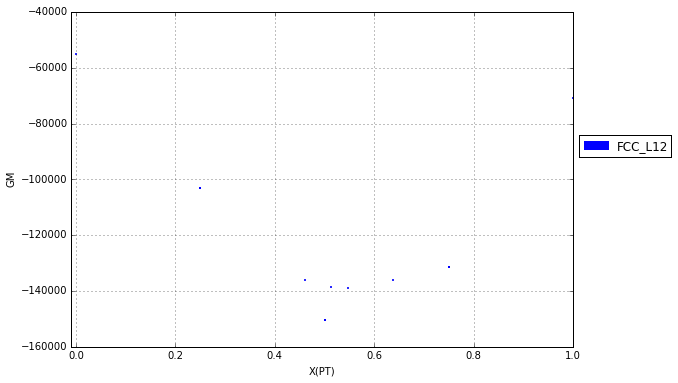

In [4]:
db_alpt = Database('alpt_2015.tdb')
#my_phases_alpt = ['PT2AL', 'ALPT2', 'FCC_L12', 'BCC_B2', 'PT5AL21',
#                  'ALPT', 'PT5AL3', 'LIQUID', 'AL3NI2', 'PT8AL21', 'PT2AL3']
#my_phases_alpt = ['PT2AL', 'BCC_B2', 'PT5AL21', 'PT5AL3', 'FCC_L12', 'FCC_A1', 'LIQUID', 'AL3NI2', 'PT8AL21', 'PT2AL3']
my_phases_alpt = ['FCC_L12']
pdens_dict = [{'FCC_L12': 1}, 100]
from pycalphad import energy_surf
from pycalphad.plot.utils import phase_legend 
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
%time nrg_df = energy_surf(db_alpt, ['AL', 'PT', 'VA'], my_phases_alpt, T=1200.0, pdens=pdens_dict)
group_df = nrg_df.groupby('Phase')
legend_handles, colors = phase_legend(my_phases_alpt)
for phase, phase_df in group_df:
    ax = phase_df.plot(kind='scatter', x='X(PT)', y='GM', ax=ax, color=colors[phase.upper()], s=1, xlim=(-1e-2,1))
ax = ax.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.6))

pycalphad WARNING 2015-03-28 15:03:29,959 [__init__ 77] Setting undefined symbol VX47 for phase LIQUID to zero
pycalphad WARNING 2015-03-28 15:03:29,976 [__init__ 77] Setting undefined symbol VX45 for phase LIQUID to zero
pycalphad WARNING 2015-03-28 15:03:29,993 [__init__ 77] Setting undefined symbol VX46 for phase LIQUID to zero


CPU times: user 30.1 s, sys: 1.86 s, total: 31.9 s
Wall time: 24.7 s


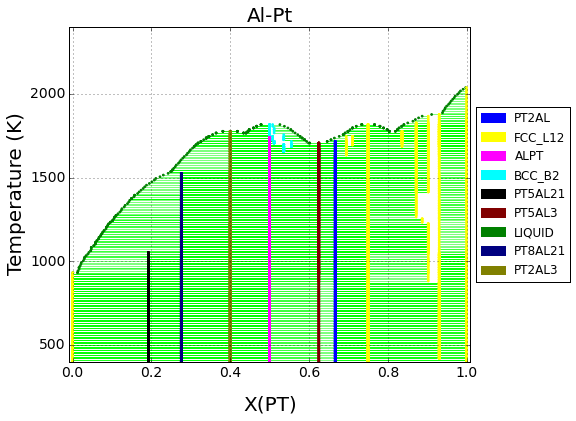

In [4]:
db_alpt = Database('alpt_2015.tdb')
my_phases_alpt = ['PT2AL', 'FCC_L12', 'ALPT', 'BCC_B2', 'PT5AL21',
                  'PT5AL3', 'LIQUID', 'PT8AL21', 'PT2AL3']
#my_phases_alpt = ['PT8AL21']
fig = plt.figure(figsize=(9,6))
pdens_dict = [{'FCC_L12': 1000}, 1000]
%time ax = binplot(db_alpt, ['AL', 'PT', 'VA'] , my_phases_alpt, 'X(PT)', 400.0, 2400.0, ax=plt.gca(), mode='numexpr', pdens=pdens_dict)